In [118]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt, colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, make_scorer, rand_score
from sklearn.metrics.pairwise import manhattan_distances

***ЗАДАНИЕ 1***

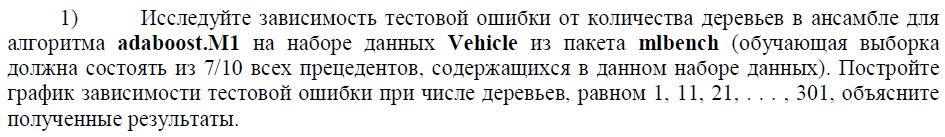

In [83]:
data = pd.read_csv('vehicle_csv.csv')
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [84]:
X, y = data.drop("Class", axis=1), data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [85]:
tree = DecisionTreeClassifier(max_depth=2)
xs = np.arange(1, 302, 10)
ys = []
for size in xs:
    clf = AdaBoostClassifier(n_estimators=size) # (base_estimator=tree, n_estimators=size)
    clf.fit(X_train, y_train)
    ys.append(clf.score(X_test, y_test))
    print(size, clf.score(X_test, y_test))

1 0.36220472440944884
11 0.5905511811023622
21 0.5866141732283464
31 0.6023622047244095
41 0.5984251968503937
51 0.5354330708661418
61 0.5551181102362205
71 0.5511811023622047
81 0.594488188976378
91 0.5708661417322834
101 0.5748031496062992
111 0.5905511811023622
121 0.6377952755905512
131 0.6023622047244095
141 0.6141732283464567
151 0.6062992125984252
161 0.6181102362204725
171 0.6181102362204725
181 0.6377952755905512
191 0.6417322834645669
201 0.6417322834645669
211 0.6377952755905512
221 0.6535433070866141
231 0.6496062992125984
241 0.6456692913385826
251 0.65748031496063
261 0.6614173228346457
271 0.6456692913385826
281 0.6653543307086615
291 0.65748031496063
301 0.6535433070866141


Text(0, 0.5, 'test score')

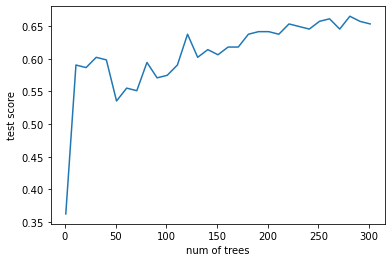

In [86]:
plt.plot(xs, ys)
plt.xlabel("num of trees")
plt.ylabel('test score')

***ЗАДАНИЕ 2***

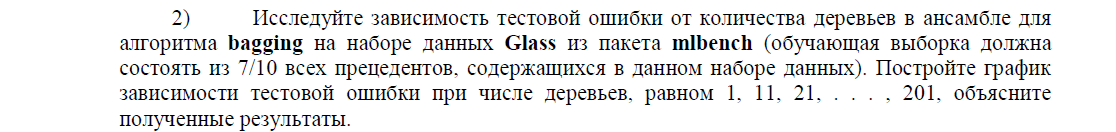

In [87]:
data = pd.read_csv('glass.data', header=None)
data = data.drop(0, axis=1)
data.head()

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [88]:
X, y = data.drop(10, axis=1), data[10]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [89]:
tree = DecisionTreeClassifier(max_depth=4)
xs = np.arange(1, 202, 10)
ys = []
for size in xs:
    clf = BaggingClassifier(n_estimators=size, bootstrap_features=True)  # (base_estimator=tree, n_estimators=size, bootstrap_features=True)
    clf.fit(X_train, y_train)
    ys.append(clf.score(X_test, y_test))
    print(size, clf.score(X_test, y_test))

1 0.676923076923077
11 0.7384615384615385
21 0.8461538461538461
31 0.7692307692307693
41 0.7846153846153846
51 0.8
61 0.7846153846153846
71 0.7538461538461538
81 0.7846153846153846
91 0.7230769230769231
101 0.7692307692307693
111 0.7538461538461538
121 0.7846153846153846
131 0.8153846153846154
141 0.7538461538461538
151 0.7692307692307693
161 0.7846153846153846
171 0.7538461538461538
181 0.7384615384615385
191 0.7538461538461538
201 0.7692307692307693


Text(0, 0.5, 'test score')

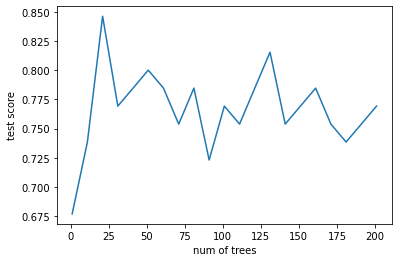

In [90]:
plt.plot(xs, ys)
plt.xlabel("num of trees")
plt.ylabel('test score')

***ЗАДАНИЕ 3***

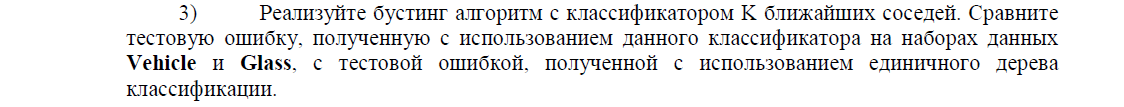

*К сожалению, sklearn не позволяет сделать бустинг из KNeighborsClassifier*

In [144]:
def pipeline(ds_name, target, drop=None, encode=False, no_header=False):
    if no_header:
        data = pd.read_csv(ds_name, header=None)
    else:
        data = pd.read_csv(ds_name)
    if not (drop is None):
        data = data.drop(drop, axis=1)
    X = data.drop(target, axis=1)
    if encode: 
        y = LabelEncoder().fit_transform(data[target])
    else:
        y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    knn = KNeighborsClassifier()
    clf = AdaBoostClassifier(base_estimator=knn, algorithm='SAMME')
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

In [145]:
pipeline('vehicle_csv.csv', 'Class', encode=True)

ValueError: KNeighborsClassifier doesn't support sample_weight.

In [146]:
pipeline('glass.data', 10, drop=0, no_header=True)

ValueError: KNeighborsClassifier doesn't support sample_weight.